In [2]:
import numpy as np
import pandas as pd
import pylab as plt
import matplotlib

%matplotlib inline

In [6]:
cleaned_data_location = 'data/gapminder_cleaned.csv'
df = pd.read_csv(cleaned_data_location)
df.head()

FileNotFoundError: File b'data/gapminder_cleaned.csv' does not exist

In [8]:
cleaned_data_location = 'data/gapminder_cleaned.csv'
try:
    df = pd.read_csv(cleaned_data_location)
    
except FileNotFoundError:
    print("Could not find data file, check path? You tried", cleaned_data_location)

Could not find data file, check path? You tried data/gapminder_cleaned.csv


In [10]:
VERBOSE = True

cleaned_data_location = '../data/gapminder_cleaned.csv'
try:
    df = pd.read_csv(cleaned_data_location)
    if VERBOSE:
        print(df.head())
    
except FileNotFoundError:
    print("Could not find data file, check path? You tried", cleaned_data_location)

   year       pop  lifeexp   gdppercap      country continent
0  1952   8425333   28.801  779.445314  afghanistan      asia
1  1957   9240934   30.332  820.853030  afghanistan      asia
2  1962  10267083   31.997  853.100710  afghanistan      asia
3  1967  11537966   34.020  836.197138  afghanistan      asia
4  1972  13079460   36.088  739.981106  afghanistan      asia


In [13]:
years = df['year'].unique()
#shows all the unique years in the data frame
years.sort()
#inplace sort on the array
assert years [-1] == 2007, "Incorrect year"
#if the last year is not 2007 we will get an assertion message to indicate 

In [19]:
#Calculate mean life expectancy for Asia 
mask_asia = df['continent'] == 'asia'
df_asia = df[mask_asia]

#Making a loop
years = df_asia['year'].unique()
summary = []
for year in years:
    mask_year = df_asia['year'] == year
    df_year = df_asia[mask_year]
    value = np.mean(df_year['lifeexp'])
    summary.append(('asia',year,value))
assert len(summary) == 12

#Turn the summary into a data frame so we can easily visualize it
result_df = pd.DataFrame(summary, columns=['continent','year','lifeexp'])
result_df

,continent,year,lifeexp
0,asia,1952,46.314394
1,asia,1957,49.318544
2,asia,1962,51.563223
3,asia,1967,54.663640
4,asia,1972,57.319269
5,asia,1977,59.610556
6,asia,1982,62.617939
7,asia,1987,64.851182
8,asia,1992,66.537212
9,asia,1997,68.020515


In [22]:
#Calculate mean life expectancy for continents for all years
category = 'lifeexp'
continent = 'asia'

mask_continent = df['continent'] == continent
df_continent = df[mask_continent]

#Making a loop
years = df_continent['year'].unique()
summary = []
for year in years:
    mask_year = df_continent['year'] == year
    df_year = df_continent[mask_year]
    value = np.mean(df_year[category])
    summary.append((continent,year,value))
assert len(summary) == 12

#Turn the summary into a data frame so we can easily visualize it
result_df = pd.DataFrame(summary, columns=['continent','year',category])
result_df

,continent,year,lifeexp
0,asia,1952,46.314394
1,asia,1957,49.318544
2,asia,1962,51.563223
3,asia,1967,54.663640
4,asia,1972,57.319269
5,asia,1977,59.610556
6,asia,1982,62.617939
7,asia,1987,64.851182
8,asia,1992,66.537212
9,asia,1997,68.020515


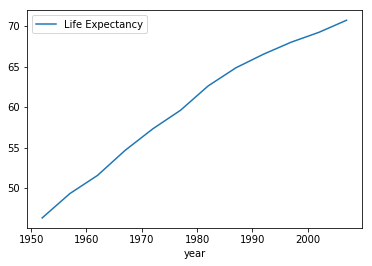

In [23]:
result_df.plot.line('year',category, label='Life Expectancy')

In [24]:
def calculate_mean_over_time(data, category, continent, verbose=False):
    #Calculate mean category for continents for all years
    
    #Creating a mask that selects the continent of choice 
    mask_continent = data['continent'] == continent
    df_continent = data[mask_continent]

    #Making a loop over years and calculating the statistic of interest into summary variable
    years = df_continent['year'].unique()
    summary = []
    
    for year in years:
        if verbose:
            print(year)
        mask_year = df_continent['year'] == year
        df_year = df_continent[mask_year]
        value = np.mean(df_year[category])
        summary.append((continent,year,value))
        
    #There should be 12 records for each continent
    assert len(summary) == 12

    #Turn the summary into a data frame so we can easily visualize it
    result_df = pd.DataFrame(summary, columns=['continent','year',category])
    return result_df

In [27]:
calculate_mean_over_time(df, 'lifeexp', 'asia')

,continent,year,lifeexp
0,asia,1952,46.314394
1,asia,1957,49.318544
2,asia,1962,51.563223
3,asia,1967,54.663640
4,asia,1972,57.319269
5,asia,1977,59.610556
6,asia,1982,62.617939
7,asia,1987,64.851182
8,asia,1992,66.537212
9,asia,1997,68.020515


In [58]:
def calculate_statistic_over_time(data, category, continent, func, verbose=False):
    """Calculate values of a statistic through time
    
    Args:
        data: a data frame
        category: one of the column headers of the data frame (e.g. 'lifeexp')
        continent: possible value of continent column in that data frame (e.g. 'asia')
        func: the function to apply data values (e.g. np.mean)
        
    Returns:
        a summary table of values per year
    """
    #check the values
    assert category in data.columns.values, 'Category must be one of the data frame columns'
    assert 'continent' in data.columns.values, 'Continent column not found in data frame'
    assert continent in data['continent'].unique(), 'Continent value not found in data frame'
    
    #Calculate statistic category for continents for all years
    #Func must be entered as np.func
    
    #Creating a mask that selects the continent of choice 
    mask_continent = data['continent'] == continent
    df_continent = data[mask_continent]

    #Making a loop over years and calculating the statistic of interest into summary variable
    years = df_continent['year'].unique()
    summary = []
    
    for year in years:
        mask_year = df_continent['year'] == year
        df_year = df_continent[mask_year]
        #Enter this line below to apply for any statastic you would want
        value = func(df_year[category])
        summary.append((continent,year,value))
        
    #There should be 12 records for each continent
    assert len(summary) == 12

    #Turn the summary into a data frame so we can easily visualize it
    result_df = pd.DataFrame(summary, columns=['continent','year',category])
    return result_df

In [61]:
calculate_statistic_over_time(df,'pop','asia',np.mean)

,continent,year,pop
0,asia,1952,4.228356e+07
1,asia,1957,4.735699e+07
2,asia,1962,5.140476e+07
3,asia,1967,5.774736e+07
4,asia,1972,6.518098e+07
5,asia,1977,7.225799e+07
6,asia,1982,7.909502e+07
7,asia,1987,8.700669e+07
8,asia,1992,9.494825e+07
9,asia,1997,1.025238e+08


In [62]:
calculate_statistic_over_time(df,'pop','americas',np.mean)

,continent,year,pop
0,americas,1952,13806097.84
1,americas,1957,15478156.64
2,americas,1962,17330810.16
3,americas,1967,19229864.92
4,americas,1972,21175368.40
5,americas,1977,23122707.96
6,americas,1982,25211636.80
7,americas,1987,27310158.84
8,americas,1992,29570964.16
9,americas,1997,31876016.40


In [53]:
help(calculate_statistic_over_time)

Help on function calculate_statistic_over_time in module __main__:

calculate_statistic_over_time(data, category, continent, func)
    Calculate values of a statistic through time
    
    Args:
        data: a data frame
        category: one of the column headers of the data frame (e.g. 'lifeexp')
        continent: possible value of continent column in that data frame (e.g. 'asia')
        func: the function to apply data values (e.g. np.mean)
        
    Returns:
        a summary table of values per year



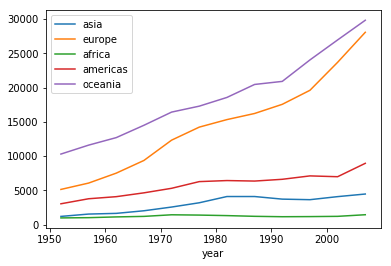

In [71]:
#Plot life expectancy over time for all continents
continents = df['continent'].unique()
fig, ax = plt.subplots()

for continent in continents:
    output = calculate_statistic_over_time(df, 'gdppercap', continent, np.median)
    output.plot.line('year', 'gdppercap', ax = ax, label = continent)

2.736986301369863